In [1]:
from qutip import *
from matplotlib.pyplot import figure
from scipy.signal import argrelextrema
import numpy as np
import time
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
# zero field splitting
Dzfs = 2*np.pi*3.471e9

# gyromagnetic ratios
gammae = 2*np.pi*2.79925e10
gammaN = 2*np.pi*3.078e6

# Fermi contact hyperfine coupling
Ahf_xx = 2*np.pi*np.array([ 79.406, 46.944, 79.406])*1e6
Ahf_yy = 2*np.pi*np.array([ 58.170, 90.025, 58.170])*1e6
Ahf_zz = 2*np.pi*np.array([ 48.159, 48.158, 48.159])*1e6
Ahf_xy = 2*np.pi*np.array([ 18.391, 0.000, -18.391])*1e6

# Normalization
units = 2*np.pi*1e6
De = Dzfs/units
ge = gammae/units
gN = gammaN/units

Axx = Ahf_xx/units
Ayy = Ahf_yy/units
Azz = Ahf_zz/units
Axy = Ahf_xy/units

A_perp = (Axx + Ayy)/(2*np.sqrt(2))
B_perp = (Axx - Ayy)/(2*np.sqrt(2))

AA = [Axx, Ayy, Azz, Axy, A_perp, B_perp]

In [4]:
def Bop(phi,N):
    B = (4*N*A_perp.mean()/phi + De + 0.5*Azz.mean())/(ge-gN)
    return B

In [5]:
N_rev = [10,20,30,40,50]
Blist = [Bop(np.pi/4,N) for N in N_rev]

p = 5
T_p_max = p*(2*np.pi/((ge*np.max(Blist) - De) - gN*np.max(Blist) - 0.5*Azz.mean()))
M = 5000
fold = 1.25
M_ref = int(M//fold)
tlist = np.linspace(0, fold*np.max(N_rev)*T_p_max, M+1) 

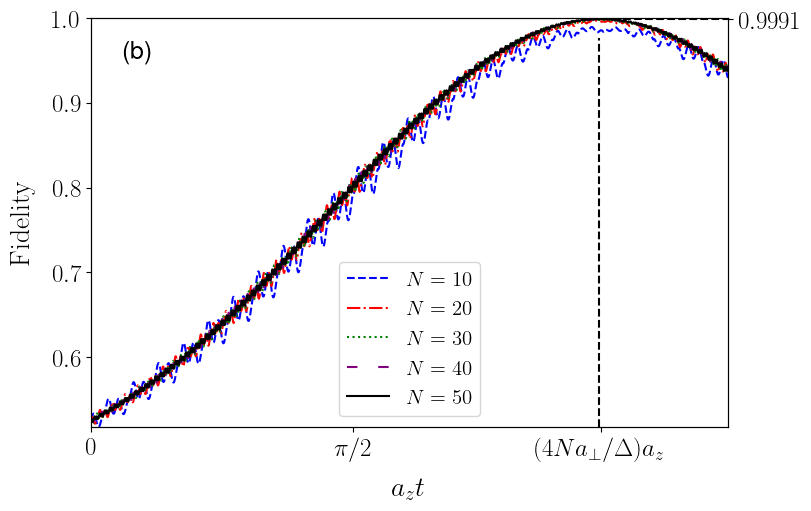

In [6]:
import pickle
fidel_exact = pickle.load(open("Fidelity_Hadamard-zy-axis", "rb"))
Blist = [Bop(np.pi/4,N) for N in N_rev]
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

CR = ['b','r','g','purple','k']
CS = ['--', '-.', ':',(0, (5, 10)),'-']

line = [[] for k in range(len(Blist))]
for k in range(len(Blist)):
    line[k], = axis.plot(tlist*Azz.mean()/2, fidel_exact[k,:], CR[k], ls=CS[k], lw=1.5, label=r"$N = "+str(int(N_rev[k]))+"$")

max_list = [np.around(np.max(fidel_exact[k]),decimals=4) for k in [4]]
max_list_lab = [r'$'+str(ylab)+'$' for ylab in max_list]

axis.set_xlabel(r'$a_zt~$', fontsize=20, labelpad=10)
axis.set_xticks(np.array([0,np.pi/2,tlist[M_ref]*Azz.mean()/2]),[r'$0$',r'$\pi/2$',r'$(4Na_\perp/\Delta)a_z$'], fontsize=18)
axis.set_ylabel(r'$\rm Fidelity$', fontsize=20, labelpad=40)
axis.set_yticks(max_list,max_list_lab, fontsize=18)
axis.autoscale(enable=True, axis='x', tight=True)
axis.legend(handles=line, fontsize=15, loc='lower center')

t_ref = tlist[np.argmax(fidel_exact[4])]*Azz.mean()/2
F_max = np.max(fidel_exact[1])-0.045
axis.axvline(x=t_ref, ymin = 0, ymax = F_max, color='k', linestyle='--')
for k in [4]:
    axis.axhline(y = np.max(fidel_exact[k]), xmin = tlist[M_ref]/np.max(tlist), xmax = 1, color='k', linestyle='--')

axis2 = axis.twinx()
axis2.yaxis.tick_left()
axis.yaxis.tick_right()

ylist = [np.around(k/10,decimals=1) for k in range(1,11)]
ylist_lab = [r'$'+str(ylab)+'$' for ylab in ylist]
axis2.set_yticks(ylist, ylist_lab, fontsize=18)

axis.set_ylim(np.min(fidel_exact), 1)
axis2.set_ylim(np.min(fidel_exact), 1)

axis.text(0.05, 0.90, r'(b)',transform=axis.transAxes,size=18)

plt.savefig('Fig4b_Fidelity_Hadamard-zy-axis.pdf',bbox_inches='tight')


In [7]:
N_rev = [10*(k+1) for k in range(10)]
Blist = [Bop(np.pi/4,N) for N in N_rev]
plist = [2*k + 1 for k in range(16)]

T_p_max = np.max(plist)*(2*np.pi/((ge*np.max(Blist) - De) - gN*np.max(Blist) + 0.5*Azz.mean()))
M = 100
fold = 1
tlist = np.linspace(0, fold*np.max(N_rev)*T_p_max, M+1) 

In [8]:
import pickle
fidel_max = pickle.load(open("Fidelity_Hadamard-zy-axis_vary-N-and-p", "rb"))

N_rev = [10*(k+1) for k in range(10)]
Blist = [Bop(np.pi/4,N) for N in N_rev]
plist = [2*k + 1 for k in range(16)]

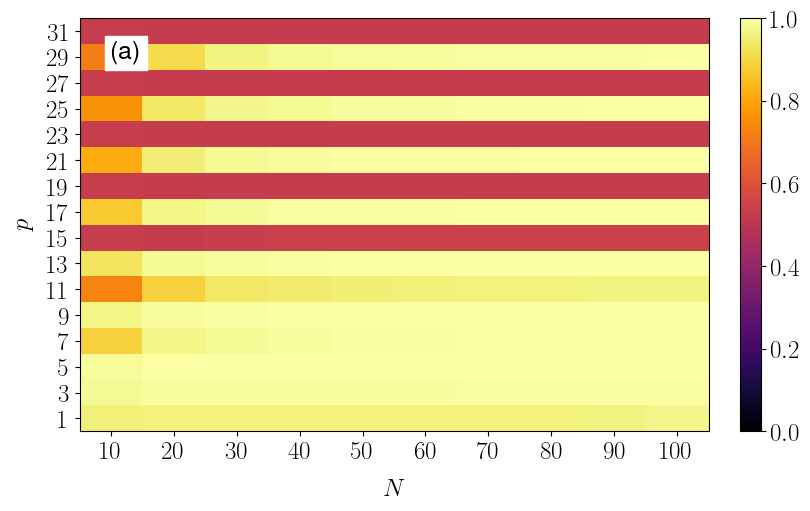

In [9]:
N_rev = [10*(k+1) for k in range(10)]
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

p = axis.pcolormesh(fidel_max, vmin = 0, vmax = 1, cmap = 'inferno')
cbar = fig.colorbar(p)
cbar.ax.tick_params(labelsize=18)

axis.set_xticks([k+0.5 for k in range(len(N_rev))],[r'$'+str(N)+'$' for N in N_rev], fontsize=18)
axis.set_xlabel(r'$N$', fontsize=18, labelpad=10)
axis.set_yticks([k+0.5 for k in range(len(plist))],[r'$'+str(p)+'$' for p in plist], fontsize=18)
axis.set_ylabel(r'$p$', fontsize=18, labelpad=10)

axis.text(0.05, 0.90, r'(a)',transform=axis.transAxes,size=18,backgroundcolor='white')

plt.savefig('Fig4a_Fidelity_Hadamard-zy-axis_vary-N-and-p.pdf',bbox_inches='tight')